# Electric Vehicle Charging Stations 

### 
Data: U.S. Department of Energy  
https://afdc.energy.gov/fuels/electricity_locations.html#/analyze?country=US&fuel=ELEC&ev_levels=all 

<hr>

# Import

In [2]:
# Imports

import pandas as pd
import numpy as np 

# vis
import matplotlib.pyplot as plt

# nan
import missingno as msno








"""from pandas.io.json import json_normalize
import json
#
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import seaborn as sns
import numpy as np

# set figure size 
sns.set(rc={'figure.figsize':(21,9)})



from pandas.io.json import json_normalize
import json"""

"from pandas.io.json import json_normalize\nimport json\n#\nimport matplotlib.pyplot as plt\nimport matplotlib.dates as mdates\nfrom matplotlib.dates import DateFormatter\n\nimport seaborn as sns\nimport numpy as np\n\n# set figure size \nsns.set(rc={'figure.figsize':(21,9)})\n\n\n\nfrom pandas.io.json import json_normalize\nimport json"

# Data Ingestion
<hr>

In [3]:
# file hunting
! ls ../data


austin-tx         boundaries        stations-gov-site


In [4]:
# read data
df = pd.read_csv('../data/stations-gov-site/all_EV_stations.csv', low_memory=False)

In [5]:
# shape
df.shape

(47559, 65)

In [6]:
# quick look
df.head(3)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Southern California Edison - Rosemead Office B...,2244 Walnut Grove Ave,NaN,Rosemead,CA,91770,NaN,NaN,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# tail
df.tail(3)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
47556,ELEC,Atlantico at Miramar,12121 Southwest 43rd Street,NaN,Miramar,FL,33025,NaN,800-663-5633,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47557,ELEC,CORK FACTORY CORK 7,2350 Railroad St,NaN,Pittsburgh,PA,15222,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47558,ELEC,LAS CRUCES DOWNTOWN PLAZA,101 E Organ Ave,NaN,Las Cruces,NM,88001,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47559 entries, 0 to 47558
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    47559 non-null  object 
 1   Station Name                      47559 non-null  object 
 2   Street Address                    47559 non-null  object 
 3   Intersection Directions           2361 non-null   object 
 4   City                              47559 non-null  object 
 5   State                             47559 non-null  object 
 6   ZIP                               47559 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     44765 non-null  object 
 9   Status Code                       47559 non-null  object 
 10  Expected Date                     154 non-null    object 
 11  Groups With Access Code           47559 non-null  object 
 12  Acce

In [9]:
# Quick look

df.sample(3).T

,1384,13052,8872
Fuel Type Code,ELEC,ELEC,ELEC
Station Name,Dave Solon Nissan,Marble Works Partnership - Tesla Destination,Delray Marketplace - Tesla Supercharger
Street Address,2525 W US Highway 50,228 Maple St,14851 Lyons Road
Intersection Directions,NaN,NaN,NaN
City,Pueblo,Middlebury,Delray Beach
...,...,...,...
CNG PSI,NaN,NaN,NaN
CNG Vehicle Class,NaN,NaN,NaN
LNG Vehicle Class,NaN,NaN,NaN
EV On-Site Renewable Source,NaN,NaN,NaN


# Quick EDA
<hr>

#### Unique Values per Feature

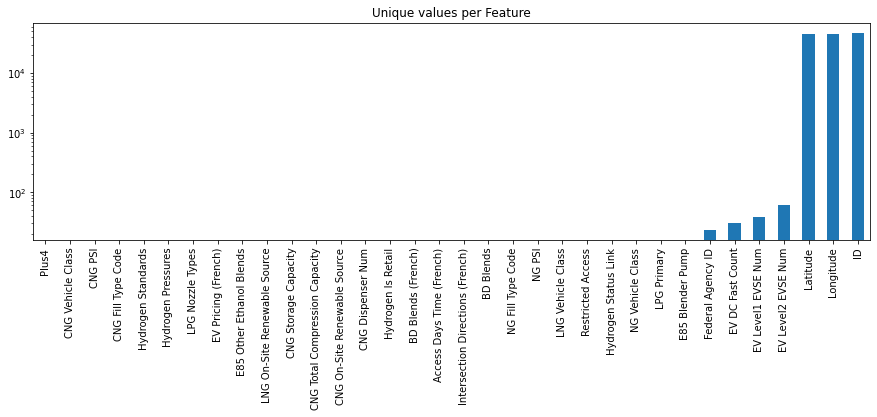

In [10]:
# See how many unique entries is in each numerical feature 
unique_values = df.select_dtypes(include= 'number').nunique().sort_values()

# Plot unique values with a y-axis in log-scale
unique_values.plot.bar(logy=True, figsize = (15,4), title='Unique values per Feature');


In [11]:
unique_values

Plus4                                   0
CNG Vehicle Class                       0
CNG PSI                                 0
CNG Fill Type Code                      0
Hydrogen Standards                      0
Hydrogen Pressures                      0
LPG Nozzle Types                        0
EV Pricing (French)                     0
E85 Other Ethanol Blends                0
LNG On-Site Renewable Source            0
CNG Storage Capacity                    0
CNG Total Compression Capacity          0
CNG On-Site Renewable Source            0
CNG Dispenser Num                       0
Hydrogen Is Retail                      0
BD Blends (French)                      0
Access Days Time (French)               0
Intersection Directions (French)        0
BD Blends                               0
NG Fill Type Code                       0
NG PSI                                  0
LNG Vehicle Class                       0
Restricted Access                       0
Hydrogen Status Link              

<br>

#### Check for Duplicates

In [12]:
# Check number of duplicates
n_duplicates = df.duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

#  Extract column names of all features
columns_to_consider = df.columns

# Drop duplicates based on 'columns_to_consider'
df_X = df.drop_duplicates(subset=columns_to_consider)
df_X.shape


You seem to have 0 duplicates in your database.


(47559, 65)

In [13]:
# check duplicates
dif = set(df.index) - set(df_X.index) 
dif

set()

<br>

#### Nan

In [14]:
# When new data set is added check 'Expected Date'
# before all this row is cleaned out of the dataset
df['Expected Date'].count()

df['EV Other Info'].unique()

array([nan,
       '1 LP Inductive  1 SP Inductive  1 Avcon Conductive  1 Other Conductive',
       '1 LP Inductive', '1 SP Inductive', '2 Conductive 240V',
       '3 SP Inductive', '1 SP Inductive  1 Tesla Conductive',
       '2 SP Inductive  1 Avcon Conductive  1 Tesla Conductive',
       '2 SP Inductive', '6 Conductive 120V/240V NEMA 14-50',
       '2 Tesla Conductive', '1 Tesla Conductive', '1 Conductive 120V',
       '7 Conductive 120V', '2 Conductive 120V  1 Conductive 240V'],
      dtype=object)

In [15]:
msno.matrix(df);

In [ ]:
msno.bar(df);

<br>

#### Numerical Features

In [ ]:
# Numerical Features

df.plot(lw=0,
    marker='.',
    subplots=True,
    layout=(-1,4),
    figsize=(15,15),
    markersize=1);

<br>

#### Non-Numerical Features

In [ ]:
# number of non-numerical features
df.select_dtypes(exclude=["number", "datetime"]).shape

In [ ]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=31, figsize=(24, 69))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

<br>

#### Feature Distrobution

In [ ]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(41, 21), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [ ]:
df.columns

# Cleaning
<hr>

##### Droping Columns

In [ ]:
# checking columns value

In [ ]:

# DROP Columns
columns_to_drop = ['Status Code','Plus4','Fuel Type Code',
            'BD Blends','NG Fill Type Code','NG PSI',
            'Hydrogen Status Link','NG Vehicle Class','E85 Blender Pump',
            'Intersection Directions (French)','Access Days Time (French)',
            'BD Blends (French)','Groups With Access Code (French)','Hydrogen Is Retail',
            'CNG Dispenser Num','CNG On-Site Renewable Source','CNG Total Compression Capacity',
            'CNG Storage Capacity','CNG Storage Capacity','LNG On-Site Renewable Source',
            'E85 Other Ethanol Blends','EV Pricing (French)','LPG Nozzle Types',
            'LPG Nozzle Types','Hydrogen Pressures','Hydrogen Standards','CNG Fill Type Code'
            ,'CNG PSI','CNG Vehicle Class','LNG Vehicle Class','Restricted Access','LPG Primary']


print()
print('Originally column count: ',df.shape[1])
# Drop Columns
df.drop(columns = columns_to_drop, axis = 1, inplace = True)
print('Current column count: ', df.shape[1])

In [ ]:
# fill in Nans

df['EV Level1 EVSE Num'] = df['EV Level1 EVSE Num'].fillna(0)
df['EV Level2 EVSE Num'] = df['EV Level2 EVSE Num'].fillna(0)
df['EV DC Fast Count'] = df['EV DC Fast Count'].fillna(0)

<br>

# Feature Creation
<hr>

<hr>

#### EXPORT CSV


In [ ]:
# Export
df.to_csv('../clean_data/all_EV_stations-clean.csv', index = False)

<br> 

# Notes
<hr>

In [ ]:
# Features to examine 

'Groups With Access Code' public private
'Access Days Time'

'Cards Accepted'


'Owner Type Code'

'Facility Type'
'EV On-Site Renewable Source'


'Open Date'
'Expected Date' 

# Exploration
<hr>

In [ ]:
# feature distrobution after the columns where dropped 

# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(41, 21), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [ ]:
# Numerical features as scatter plots , after columns where dropped

df.plot(lw=0,
    marker='.',
    subplots=True,
    layout=(-1,4),
    figsize=(15,15),
    markersize=1);

In [ ]:
df.head(1).T

In [ ]:
df['EV Network Web'].unique()
df['EV Network'].unique()
df['Access Detail Code'].unique()

In [ ]:
['Federal Agency ID', 'Federal Agency Name','Federal Agency Code',
'Intersection Directions','Station Phone','EV Other Info'